In [119]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
params = {
    'pagesize': 100,
    'g': '{"type":"Point","coordinates":[-121.4687,38.5938]}'
}

url = 'http://api.cal-adapt.org/api/series/tasmax_year_CNRM-CM5_rcp45/rasters/'

# Add HTTP header
headers = {'ContentType': 'json'}

# Make request
response = requests.get(url, params=params, headers=headers)
data = response.json()

In [121]:
# It is a good idea to check there were no problems with the request.
#if response.ok:
#    data = response.json()
    # Get a list of Raster Stores
#    results = data['results']

In [122]:
df = pd.DataFrame(data['results'])


In [123]:
#df.loc[: , ['maxval', 'minval']] = df.loc[:, ['maxval', 'minval']].apply(lambda x: x*86400)

# First change format of `event` field to datetime
df['event'] = pd.to_datetime(df['event'], format='%Y-%m-%d')
# Set event field as index
df = df.set_index(['event'])


In [118]:
df.head(2)

,geom,height,id,image,maxval,minval,name,nodata,slug,srs,tileurl,units,url,width,xpixsize,ypixsize
event,,,,,,,,,,,,,,,,
2006-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,10521,297.986603,307.180908,279.125122,yearly average maximum temperature CNRM-CM5 RC...,1.000000e+30,tasmax_year_CNRM-CM5_rcp45_2006,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_CNR...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625
2007-01-01,"{'type': 'Polygon', 'coordinates': [[[-124.562...",195,10522,297.772186,307.524902,278.383301,yearly average maximum temperature CNRM-CM5 RC...,1.000000e+30,tasmax_year_CNRM-CM5_rcp45_2007,"GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS...",http://api.cal-adapt.org/tiles/tasmax_year_CNR...,K,http://api.cal-adapt.org/api/rstores/tasmax_ye...,179,0.0625,-0.0625


In [111]:
df = df[['image']]
df = df.apply(lambda x: (x - 273.15) * 9 / 5 + 32)
df.head(5)

,image
event,
2006-01-01,76.705885
2007-01-01,76.319935
2008-01-01,76.721980
2009-01-01,75.166591
2010-01-01,78.030891


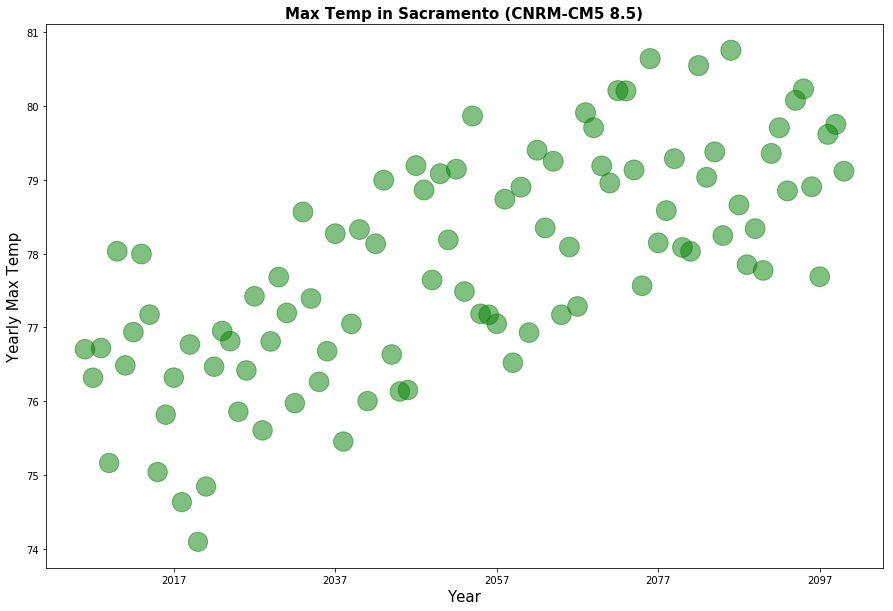

In [112]:
plt.scatter(x = df.index, y = df.image, s = df.image*5 , alpha = 0.5, color='green')
axes = plt.gca()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Yearly Max Temp', fontsize = 15)
plt.title('Max Temp in Sacramento (CNRM-CM5 8.5)', weight = 'bold', fontsize = 15)
#plt.rcParams['figure.figsize'] = [15, 10]
plt.show()